# A*

In [261]:
class Node:
    def __init__(self,value,coords):
        self.value=value
        self.coords=coords
        self.parent=None
        self.g=0
        self.h=0
        
    def __str__(self):
        s=f'{self.coords} f={self.g+self.h:0.2f}, g={self.g:0.2f}, h={self.h:0.2f}'
        return s
    
    def make_move(self,other):
        return 1

In [262]:
def manhattan(node,goal):
    xN,yN=node.coords
    xG,yG=goal.coords
    h=abs(xN-xG)+abs(yN-yG)
    return h

In [263]:
def children(current,grid):
    x,y=current.coords
    links=[(x+1,y),(x-1,y),(x,y-1),(x,y+1)]
    valid_links=[link for row in grid for link in row if link.value!=0]
    valid_children=[link for link in valid_links if link.coords in links]
    return valid_children

In [264]:
def astar(start,goal,grid):
    current=start
    openl=list()
    closedl=list()
    
    openl.append(current)
    
    while openl:
        
        current=min(openl,key=lambda o:o.g+o.h)
        if current==goal:
            path=[]
            while current.parent:
                path.append(current)
                current=current.parent
            path.append(current)
            return path[::-1]
        
        openl.remove(current)
        closedl.append(current)
        
        for node in children(current,grid):
            
            if node in closedl:
                new_cost=node.g+current.make_move(node)
                if new_cost<=node.g:
                    openl.append(node)
                    closedl.remove(node)
                    
            elif node in openl:
                new_cost=node.g+current.make_move(node)
                if new_cost<=node.g:
                    node.g=new_cost
                    node.parent=current
            
            else:
                node.g=node.g+current.make_move(node)
                node.h=manhattan(node,goal)
                node.parent=current
                openl.append(node)
    return None        

In [265]:
grid = [[1,1,1,1],
        [1,1,1,1],
        [1,1,1,1],
        [1,1,0,0],
        [1,1,0,1]]

for x in range(len(grid)):
    for y in range(len(grid[x])):
        grid[x][y]=Node(grid[x][y],(x,y))
        
start=grid[4][0]
goal=grid[0][3]

In [266]:
path=astar(start,goal,grid)
if path:
    for i in path:
        print(i.coords,end=" ")
else:
    print("No Path")

(4, 0) (3, 0) (2, 0) (1, 0) (0, 0) (0, 1) (0, 2) (0, 3) 

# KNN

In [267]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [268]:
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [269]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=23)

In [270]:
knn=KNeighborsClassifier(n_neighbors=3)

In [271]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [272]:
ypred=knn.predict(xtest)

C:\Users\vinee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [273]:
metrics.accuracy_score(ypred,ytest)

0.9666666666666667

In [274]:
metrics.confusion_matrix(ypred,ytest)

array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  0,  9]], dtype=int64)

In [275]:
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [276]:
mat=metrics.confusion_matrix(ypred,ytest)
c,w=0,0
for i in range(len(mat)):
    for j in range(len(mat[0])):
        if i==j:
            c+=mat[i][j]
        else:
            w+=mat[i][j]
print(c,w)

29 1


# LWR

In [277]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

xtrain=np.array(list(range(3,33))+[3.4,4.4])
xtrain=xtrain[:,np.newaxis]

ytrain=np.array([1,2,1,1,2,1,3,3,3,4,4,5,6,4,6,7,8,9,10,11,12,11,13,14,15,16,17,18,19,20,21,22])
ytrain=ytrain[:,np.newaxis]

In [278]:
xtest=np.array([i/10 for i in range(400)])
xtest=xtest[:,np.newaxis]

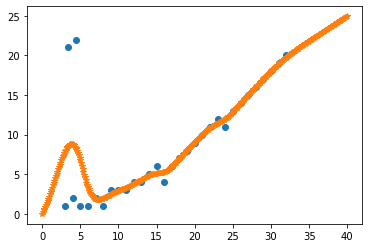

In [279]:
ytest=[]
tou=0.8

for i in xtest:
    wt=np.exp(-np.sum(xtrain-i,axis=1)**2/(2*tou)**2)
    w=np.diag(wt)
    part1=np.linalg.inv((xtrain.T).dot(w).dot(xtrain))
    part2=part1.dot((xtrain.T).dot(w).dot(ytrain))
    pred=i.dot(part2)
    ytest.append(pred)
ytest=np.array(ytest)
plt.plot(xtrain.squeeze(),ytrain,'o')
plt.plot(xtest.squeeze(),ytest,'*')
plt.show()

# EM KMeans GaussianMixture

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [281]:
iris=datasets.load_iris()

In [282]:
x=pd.DataFrame(iris.data)
print(iris.feature_names,iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [283]:
x.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [284]:
y=pd.DataFrame(iris.target)

In [285]:
y.columns=['Targets']

In [286]:
kmm=KMeans(n_clusters=3, random_state=100)
kmm.fit(x)
y_pred=kmm.labels_

In [287]:
gmm=GaussianMixture(n_components=3, covariance_type='full', random_state=100)
gmm.fit(x)
y_pred_gmm=gmm.predict(x)

Text(0.5, 1.0, 'GMM')

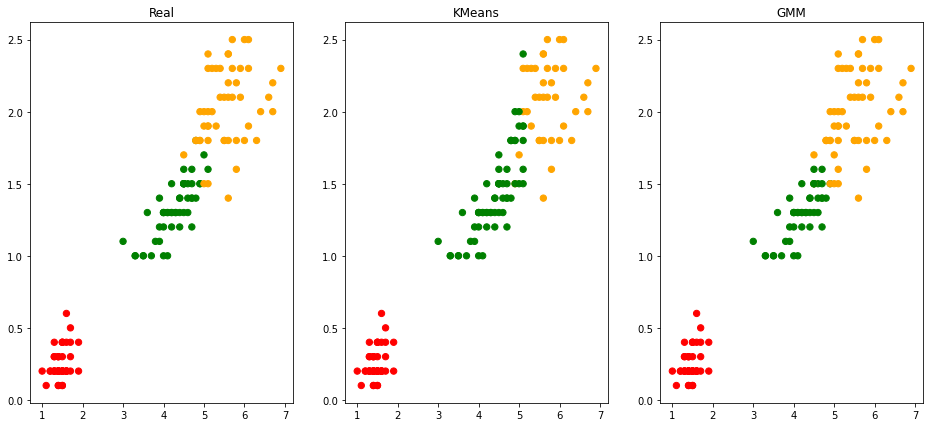

In [288]:
colormap=np.array(['red','green','orange'])
plt.figure(figsize=(16,7))
plt.subplot(1,3,1)
plt.scatter(x.petal_length, x.petal_width,c=colormap[y.Targets],s=40)
plt.title("Real")
plt.subplot(1,3,2)
plt.scatter(x.petal_length, x.petal_width,c=colormap[y_pred],s=40)
plt.title("KMeans")
plt.subplot(1,3,3)
plt.scatter(x.petal_length, x.petal_width,c=colormap[y_pred_gmm],s=40)
plt.title("GMM")

In [289]:
metrics.accuracy_score(y,y_pred)

0.8933333333333333

In [290]:
metrics.accuracy_score(y,y_pred_gmm)

0.9666666666666667

In [291]:
print(metrics.confusion_matrix(y,y_pred))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [292]:
print(metrics.confusion_matrix(y,y_pred_gmm))

[[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


# ANN

In [293]:
import numpy as np
x=np.array([[2,9],[1,5],[3,6]],dtype='float')
y=np.array([[92],[86],[89]],dtype='float')
x=x/np.amax(x,axis=0)
actual_output=y/100

epochs=1000
lr=0.15
inp_lay=2
hid_lay=3
out_lay=1

wh=np.random.uniform(low=-0.05,high=0.05,size=(inp_lay,hid_lay))
bh=np.random.uniform(low=-0.05,high=0.05,size=(1,hid_lay))
wout=np.random.uniform(low=-0.05,high=0.05,size=(hid_lay,out_lay))
bout=np.random.uniform(low=-0.05,high=0.05,size=(1,out_lay))

In [294]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    return x*(1-x)

In [295]:
for i in range(epochs):
    inph=np.dot(x,wh)+bh
    hact=sigmoid(inph)
    
    inpo=np.dot(hact,wout)+bout
    output=sigmoid(inpo)
    
    hgrad=der_sigmoid(hact)
    ograd=der_sigmoid(output)
    
    EO=actual_output-output
    d_out=EO*ograd
    
    EH=d_out.dot(wout.T)
    d_hid=EH*hgrad
    
    wh+=(x.T.dot(d_hid))*lr
    wout+=(hact.T.dot(d_out))*lr

In [296]:
print(str(x))
print(str(actual_output))
print(str(output))

[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
[[0.92]
 [0.86]
 [0.89]]
[[0.89574698]
 [0.87984212]
 [0.89436364]]


# ID3

In [297]:
import numpy as np
import pandas as pd
import math
data=pd.read_csv("PlayTennis.csv")

features=[feat for feat in data]
features

['PlayTennis', 'Outlook', 'Temperature', 'Humidity', 'Wind']

In [298]:
features.remove('PlayTennis')
features

['Outlook', 'Temperature', 'Humidity', 'Wind']

In [299]:
class Node:
    def __init__(self):
        self.value=""
        self.children=[]
        self.isLeaf=False

In [300]:
def entropy(examples):
    pc=0
    nc=0
    for i,rows in examples.iterrows():
        if rows["PlayTennis"]=="Yes":
            pc+=1
        else:
            nc+=1
    if pc==0 or nc==0:
        return 0.0
    else:
        p=pc/(pc+nc)
        n=nc/(pc+nc)
        return -(p*math.log(p,2)+n*math.log(n,2))

In [301]:
def info_gain(examples,attr):
    gain=entropy(examples)
    
    uniq=np.unique(examples[attr])
    
    for u in uniq:
        subdata=examples[examples[attr]==u]
        sube=entropy(subdata)
        gain-=(float(len(subdata))/float(len(examples)))*sube
    
    return gain

In [302]:
def ID3(examples,attr):
    root=Node()
    
    maxgain=0
    maxfeat=""
    
    for feature in attr:
        gain=info_gain(examples,feature)
        if gain>=maxgain:
            maxgain=gain
            maxfeat=feature
    root.value=maxfeat
    
    uniq=np.unique(examples[maxfeat])
    
    for u in uniq:
        subdata=examples[examples[maxfeat]==u]
        
        if entropy(subdata)==0.0:
            newNode=Node()
            newNode.value=u
            newNode.isLeaf=True
            newNode.pred=np.unique(subdata["PlayTennis"])
            root.children.append(newNode)           
        else:
            dummyNode=Node()
            dummyNode.value=u
            new_attr=attr.copy()
            new_attr.remove(maxfeat)
            child=ID3(subdata,new_attr)
            dummyNode.children.append(child)
            root.children.append(dummyNode)
            
    return root

In [303]:
def printTree(root:Node, depth=0):
    for i in range(depth):
        print('\t',end="")
    print(root.value,end="")
    if root.isLeaf:
        print("->",root.pred)
    print()
    for child in root.children:
        printTree(child,depth+1)

In [304]:
root=ID3(data,features)
printTree(root)

Outlook
	Overcast-> ['Yes']

	Rain
		Wind
			Strong-> ['No']

			Weak-> ['Yes']

	Sunny
		Humidity
			High-> ['No']

			Normal-> ['Yes']



In [305]:
def classify(root: Node,new):
    for child in root.children:
        if child.value==new[root.value]:
            if child.isLeaf:
                print("Predicted label for",new,"is:",child.pred)
                exit
            else:
                classify(child.children[0],new)

In [306]:
new = {"Outlook":"Sunny", "Temperature":"Hot", "Humidity":"Normal", "Wind":"Strong"}
classify (root, new)

Predicted label for {'Outlook': 'Sunny', 'Temperature': 'Hot', 'Humidity': 'Normal', 'Wind': 'Strong'} is: ['Yes']


# Naive Bayes

In [307]:
filename="diabetes.csv"
import pandas as pd
import numpy as np
import math
df=pd.read_csv(filename)
df=df.astype(float)
train=df.sample(frac=0.8, random_state=100)
test=df.drop(train.index)

In [309]:
outcome_group=train.groupby(df.columns[-1])
n_attr=len(df.columns)-1
summaries={}

for classValue,instances in outcome_group:
    attr_mv=[]
    mean=list(instances.mean(axis=0).values)
    std_dev=list(instances.std(axis=0).values)
    for i in range(n_attr):
        attr_mv.append([mean[i],std_dev[i]])
    summaries[classValue]=attr_mv

In [310]:
def calculateProb(x,mean,stddev):
    expval=math.exp(-math.pow(x-mean,2)/(2*math.pow(stddev,2)))
    return (1/(math.sqrt(2*math.pi)*math.pow(stddev,2)))*expval

In [311]:
def calculateClassProb(summaries,x_vec):
    probabilities={}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue]=1
        for i in range(len(classSummaries)):
            mean,stddev=classSummaries[i]
            x=x_vec[i]
            probabilities[classValue]*=calculateProb(x,mean,stddev)
    return probabilities

In [312]:
def predict(summaries,x_vec):
    prob=calculateClassProb(summaries,x_vec)
    bestLabel,bestProb=None,-1
    
    for classValues, probability in prob.items():
        if bestLabel is None or probability>bestProb:
            bestProb=probability
            bestLabel=classValue
    return bestLabel

In [313]:
predictions=[]
testSet=test.values.tolist()

for i in range(len(testSet)):
    result= predict(summaries,testSet[i])
    predictions.append(result)

In [314]:
def getAccuracy(test, predictions):
    correct = 0
    for i in range(len(test)):
        if test.iloc[i,-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

accuracy = getAccuracy(test, predictions)
print(f'Split {len(df)} rows into train={len(train)} and test={len(test)}')
print(f'Accuracy: {accuracy}')

Split 768 rows into train=614 and test=154
Accuracy: 34.41558441558442


In [315]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
data_train = train.iloc[:,:-1]
target_train  = train.iloc[:,-1]
gnb.fit(data_train, target_train)

data_test = test.iloc[:,:-1]
y_pred = gnb.predict(data_test)


from sklearn import metrics
print(f'Split {len(df)} rows into train={len(data_train)} and test={len(data_test)}')
print("Accuracy:",(metrics.accuracy_score(test.iloc[:,-1], y_pred)*100))

Split 768 rows into train=614 and test=154
Accuracy: 74.02597402597402
